In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


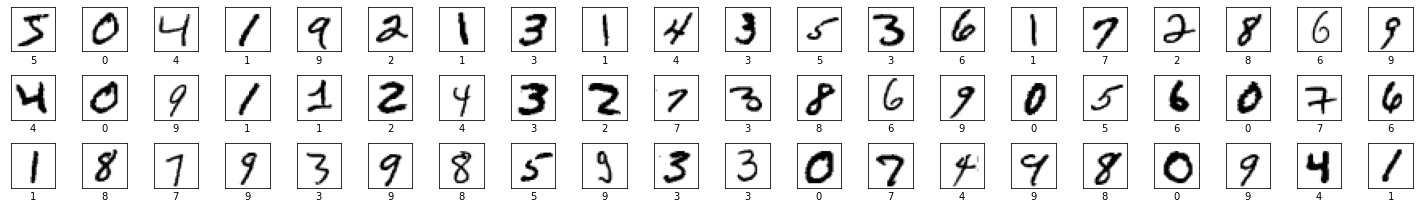

In [3]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [6]:
#reshape
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

x_train, x_test = x_train / 255.0, x_test / 255.0   #normalized

In [5]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(28,28) output->(24,24)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [8]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [9]:
h = model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2, batch_size=32) #adam with normalized data

Epoch 1/10
1500/1500 [==============================] - 23s 15ms/step - loss: 1.3553 - accuracy: 0.5167 - val_loss: 0.5744 - val_accuracy: 0.8227
Epoch 2/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.5119 - accuracy: 0.8417 - val_loss: 0.4000 - val_accuracy: 0.8779
Epoch 3/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3881 - accuracy: 0.8796 - val_loss: 0.3393 - val_accuracy: 0.8967
Epoch 4/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3218 - accuracy: 0.9011 - val_loss: 0.2739 - val_accuracy: 0.9162
Epoch 5/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2771 - accuracy: 0.9130 - val_loss: 0.2530 - val_accuracy: 0.9212
Epoch 6/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2474 - accuracy: 0.9230 - val_loss: 0.2248 - val_accuracy: 0.9327
Epoch 7/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2236 - accuracy: 0.9297 - val_loss: 0.1974 -

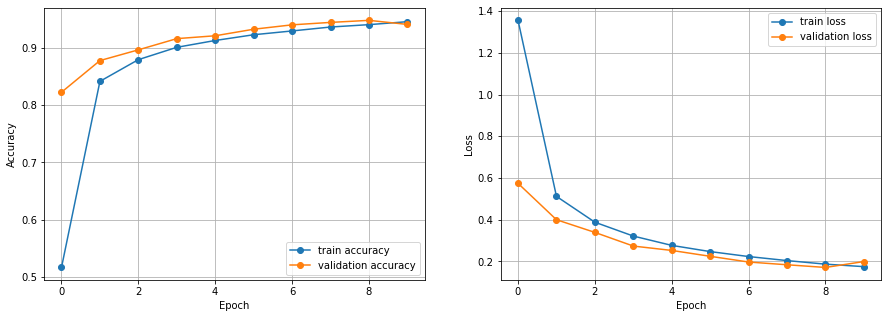

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.1862 - accuracy: 0.9421

Test Accuracy: 0.9420999884605408

Test Loss: 0.18617653846740723


In [12]:
predictions = model.predict(x_test)

In [13]:
predictions[15]

array([1.0808064e-06, 7.0282149e-05, 9.6623444e-06, 1.8394645e-02,
       9.7729367e-07, 9.7253811e-01, 1.0282585e-06, 3.4541865e-06,
       8.5203806e-03, 4.6043351e-04], dtype=float32)

In [14]:
np.argmax(predictions[15])

5

In [15]:

x_train=x_train=x_train.reshape(-1,28,28)
x_test=x_test=x_test.reshape(-1,28,28)

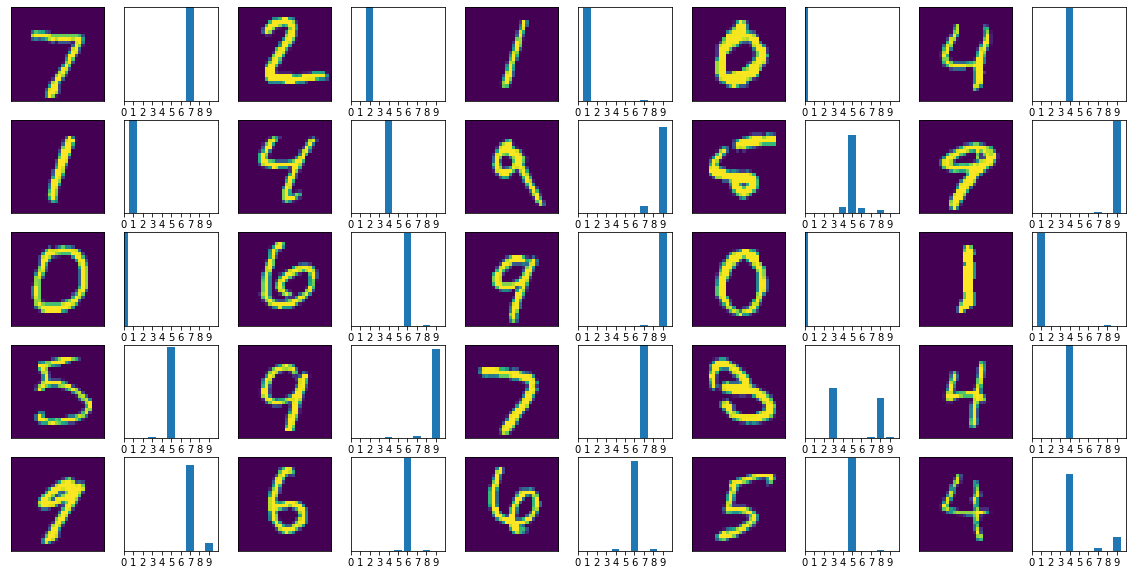

In [16]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()